##  Loading and Preparing the Data

I downloaded from the following Kaggle webpage here. Upon downloading it, the .zip file contained 2 files and 3 folders titled Train, Validation, and Test. These  3 folders will be used for our purposes.

In [ ]:
import os, shutil

original_dataset_dir = 'Birds525/train'

print("The number of bird species we are predicting for are", len([folder for folder in os.listdir(original_dataset_dir) if not folder.startswith('.')]), ".")

The number of bird species we are predicting for are 525 .


In [ ]:
## Create a dataframe for each folder category of the BIRDS 525 data set

# system libraries
from pathlib import Path
import pandas as pd

######################### TRAIN #########################
train_path = 'Birds525/train'

train_dir = Path(train_path)

filepaths = list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.png')) + list(train_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

train_df = pd.concat([filepaths, labels], axis=1)

######################### VALIDATION #########################

val_path = 'Birds525/valid'

val_dir = Path(val_path)

filepaths = list(val_dir.glob(r'**/*.JPG')) + list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.png')) + list(val_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

val_df = pd.concat([filepaths, labels], axis=1)

######################### TEST #########################

test_path = 'Birds525/test'

test_dir = Path(test_path)

filepaths = list(test_dir.glob(r'**/*.JPG')) + list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.png')) + list(test_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

test_df = pd.concat([filepaths, labels], axis=1)


In [ ]:
## Creating our train and validation generators in the absence of any data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255.
# Neural Networks work better with smaller input values
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(train_df
                                                   ,x_col='Filepath'
                                                   ,y_col='Label'
                                                   ,target_size = (150, 150)
                                                   ,batch_size = 20
                                                   ,shuffle = True
                                                   )

# The validation generator will leverage off our test data generator because we'll want to test our trained model on the same properties
validation_generator = test_datagen.flow_from_dataframe(val_df
                                                       ,x_col='Filepath'
                                                       ,y_col='Label'
                                                       ,target_size = (150, 150)
                                                       ,batch_size = 20
                                                       )

test_generator = test_datagen.flow_from_dataframe(test_df
                                                  ,x_col='Filepath'
                                                  ,y_col='Label'
                                                  ,target_size = (150, 150)
                                                  ,batch_size = 20
                                                  ,shuffle = False
                                                       )

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


## Exploratory Data Analysis (EDA)

In [ ]:
## explore the train generator

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    data_batch_check = data_batch
    labels_batch_check = labels_batch
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 525)


Printing the Image of Index 5 for current batch.
Showing the image: 


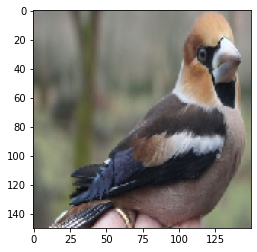


Showing the data shape: 
(150, 150, 3)

Showing the label:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
## Show a sample bird image, and highlight its shape and it's label array

import matplotlib.pyplot as plt

index = 5
print("Printing the Image of Index {} for current batch.".format(index))
print("Showing the image: ")
plt.imshow(data_batch_check[index])
plt.show()

print("\nShowing the data shape: ")
print(data_batch_check[index].shape)

print("\nShowing the label:")
print(labels_batch_check[index])


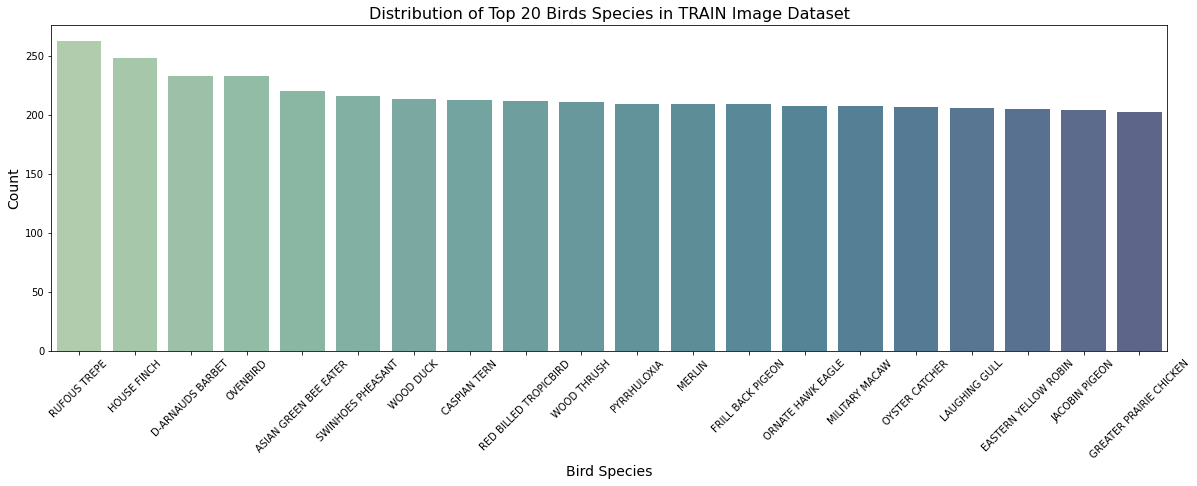

In [ ]:
## what are the top 20 labels in the Image Dataset?

import seaborn as sns

# Get the top 20 labels
label_counts = train_df['Label'].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='crest')
plt.title('Distribution of Top 20 Birds Species in TRAIN Image Dataset', fontsize=16)
plt.xlabel('Bird Species', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

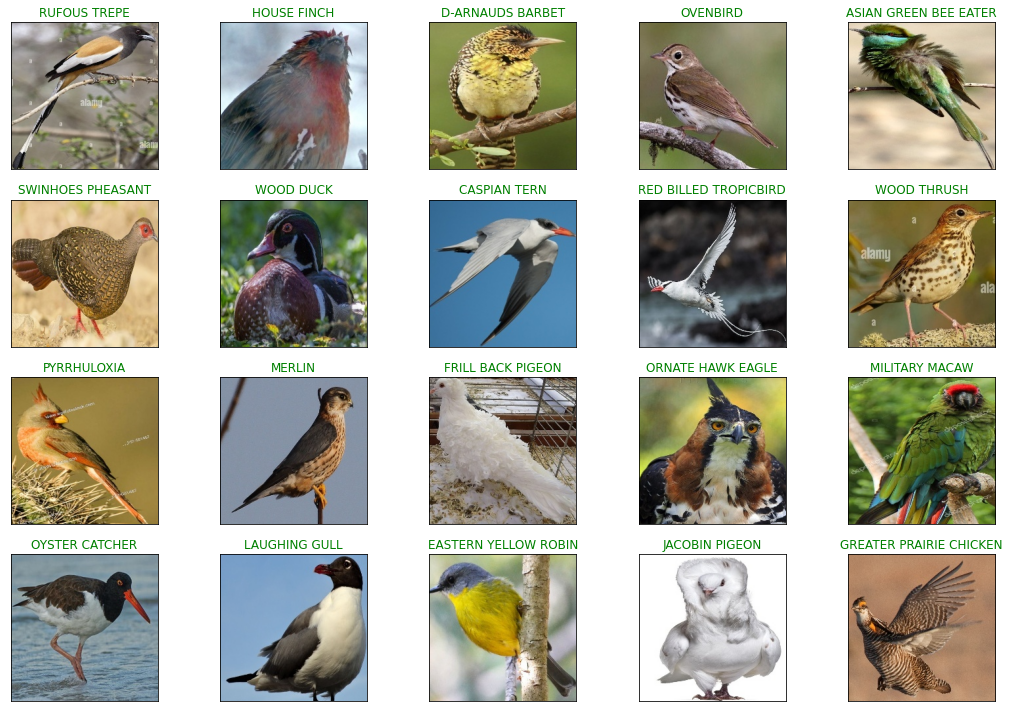

In [ ]:
## print out the images of these top 20 bird species

dedup_train_df = train_df.drop_duplicates('Label')
dedup_train_df = dedup_train_df[dedup_train_df['Label'].isin(label_counts.index)]

dedup_train_df['Label'] = pd.Categorical(dedup_train_df['Label'], categories = label_counts.index)
dedup_train_df.sort_values('Label', inplace = True)
dedup_train_df.reset_index(drop = True, inplace = True)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(dedup_train_df.Filepath[i]))
    ax.set_title(dedup_train_df.Label[i], color = 'green')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

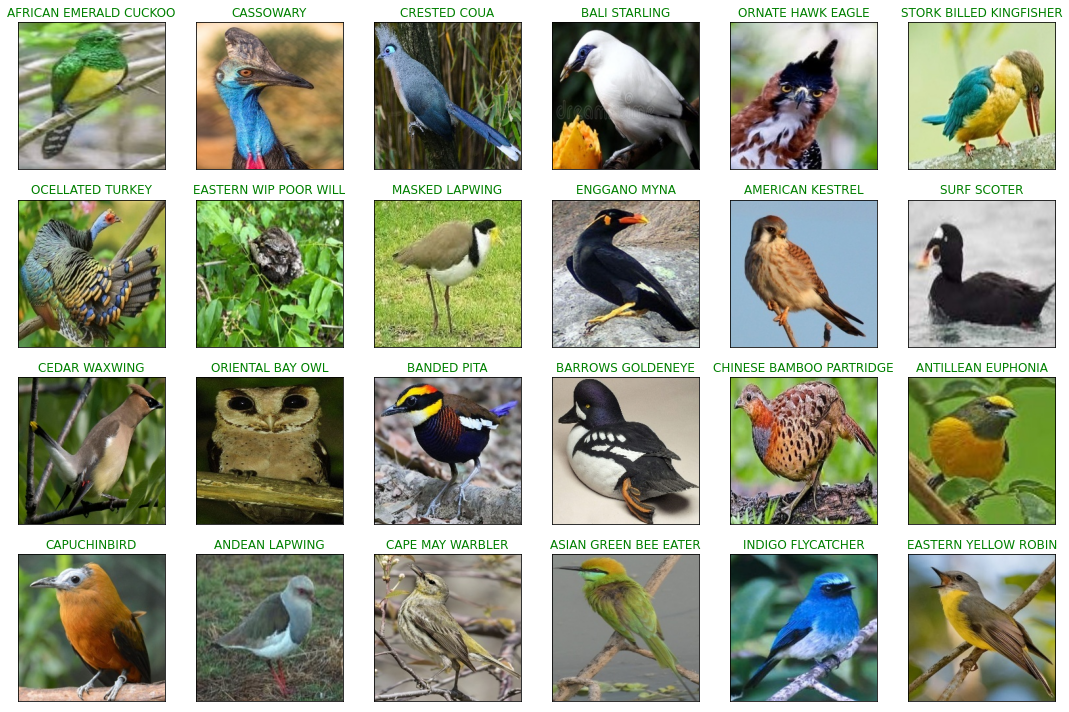

In [ ]:
## print a random set of birds to have an idea of the type of images we are training with

import numpy as np

# Display 24 birds of the TRAIN dataset with their labels
random_index = np.random.randint(0, len(train_df), 24)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[random_index[i]]))
    ax.set_title(train_df.Label[random_index[i]], color = 'green')
plt.tight_layout()
plt.show()

In [ ]:
# train a set of new functions that allows us to determine the decay in photo quality due to compression

def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

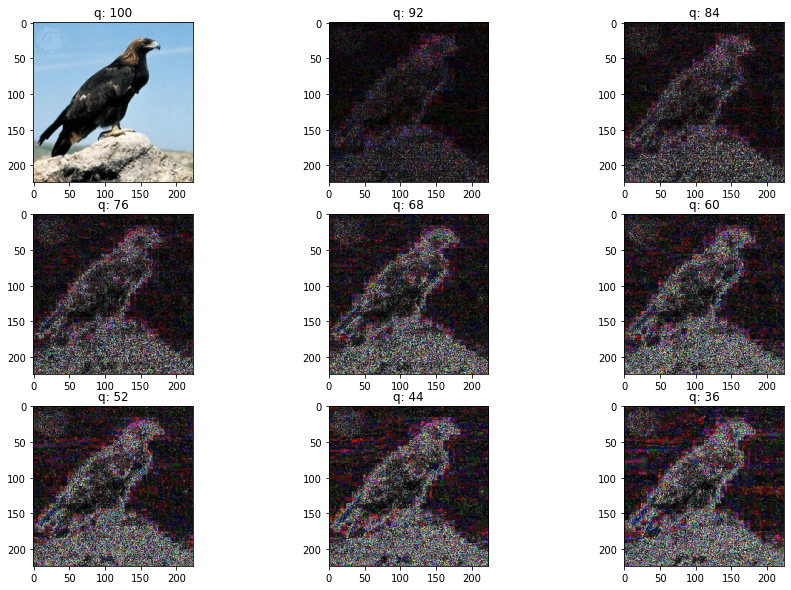

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

# View random sample from the dataset
p = random_sample('Birds525/train/GOLDEN EAGLE')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

## Convolutional Neural Network (CNN)

In [ ]:
# instantiate a baseline CNN for Birds Classification
from tensorflow.keras import models, layers

## adding a base CNN network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

## adding a classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(525, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2023-06-06 10:31:20.414920: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-06 10:31:20.414972: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-22-152): /proc/driver/nvidia/version does not exist
2023-06-06 10:31:20.415536: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
## compile the model for training
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy'
             ,optimizer = optimizers.RMSprop(learning_rate = 1e-4)
             ,metrics = ['acc'])

In [ ]:
## history of the initial network training
history = model.fit(train_generator
         ,steps_per_epoch = 100
         ,epochs = 100
         ,validation_data = validation_generator
         ,validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 23s 225ms/step - loss: 6.2634 - acc: 5.0000e-04 - val_loss: 6.2634 - val_acc: 0.0010
Epoch 2/100
100/100 [==============================] - 22s 222ms/step - loss: 6.2631 - acc: 0.0035 - val_loss: 6.2584 - val_acc: 0.0050
Epoch 3/100
100/100 [==============================] - 22s 220ms/step - loss: 6.2409 - acc: 0.0030 - val_loss: 6.2177 - val_acc: 0.0110
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 6.1966 - acc: 0.0060 - val_loss: 6.1563 - val_acc: 0.0030
Epoch 5/100
100/100 [==============================] - 22s 221ms/step - loss: 6.0963 - acc: 0.0100 - val_loss: 6.0588 - val_acc: 0.0110
Epoch 6/100
100/100 [==============================] - 23s 226ms/step - loss: 5.9901 - acc: 0.0120 - val_loss: 5.9143 - val_acc: 0.0140
Epoch 7/100
100/100 [==============================] - 23s 230ms/step - loss: 5.8900 - acc: 0.0195 - val_loss: 5.8144 - val_acc: 0.0230
Epoch 8/100
100/100 [=======================

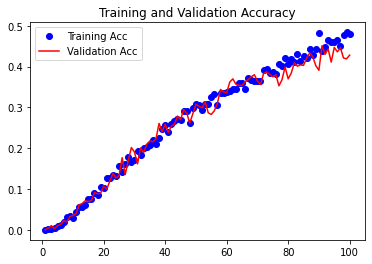

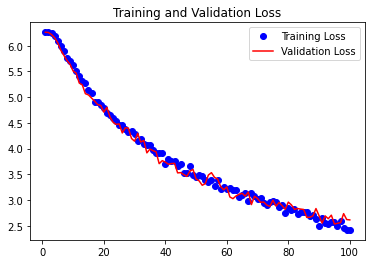

In [ ]:
# Plot a learning curve.
# The learning curve will help us monitor if our baseline model is overfitting or underfitting.

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
# Save the model
model.save('birds525_baseline_1.h5')

In [ ]:
from tensorflow.keras import models, layers

model = models.load_model('birds525_baseline_1.h5')

2023-06-22 06:03:19.731303: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-22 06:03:19.731348: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-22-152): /proc/driver/nvidia/version does not exist
2023-06-22 06:03:19.732343: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps = 50)
print('test acc:', test_acc)

29/50 [================>.............] - ETA: 1s - loss: 2.3049 - acc: 0.5069

50/50 [==============================] - 3s 50ms/step - loss: 2.4767 - acc: 0.4590
test acc: 0.45899999141693115
